How can agriculture be transformed into a resource-efficient and profitable endeavour?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


In [2]:
farmer_df = pd.read_csv('./data/farmer_advisor_dataset.csv')
market_df = pd.read_csv('./data/market_researcher_dataset.csv')

In [28]:
market_df.head()

,Market_ID,Product,Market_Price_per_ton,Demand_Index,Supply_Index,Competitor_Price_per_ton,Economic_Indicator,Weather_Impact_Score,Seasonal_Factor,Consumer_Trend_Index,demand_diff,avg_market_price
0,1,Rice,180.251212,196.085900,199.509124,300.549219,1.093636,28.474810,Medium,148.472131,-3.423224,240.400216
1,2,Rice,420.527970,188.452400,150.789483,492.097798,0.526307,70.978063,High,97.298888,37.662917,456.312884
2,3,Wheat,457.260398,171.179384,78.989326,323.003342,1.292393,80.853592,Low,131.113236,92.190058,390.131870
3,4,Soybean,237.179113,196.970677,50.464363,232.978384,0.627663,60.676069,Low,95.169417,146.506314,235.078748
4,5,Wheat,324.032925,113.165416,145.878647,312.428652,1.491255,45.379516,Low,130.297138,-32.713231,318.230789


In [29]:
numeric_columns = market_df.select_dtypes(include=[np.number]).columns
numeric_columns = numeric_columns.drop('Market_ID')

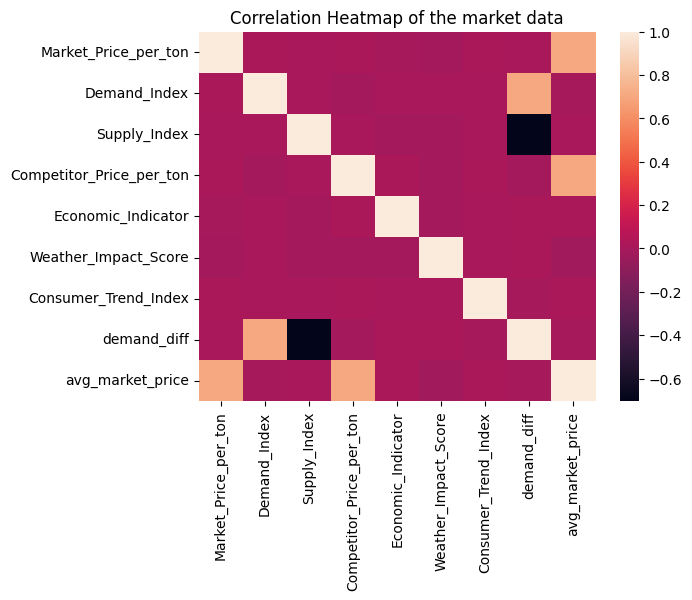

In [30]:
corr_matrix = market_df[numeric_columns].corr()
sns.heatmap(corr_matrix)
plt.title("Correlation Heatmap of the market data")
plt.show()

In [6]:
crop_names = ['Corn','Rice','Soybean','Wheat']

market_corn_df = market_df[market_df['Product'] == 'Corn'].reset_index(drop=True)
market_rice_df = market_df[market_df['Product'] == 'Rice'].reset_index(drop=True)
market_soybean_df = market_df[market_df['Product'] == 'Soybean'].reset_index(drop=True)
market_wheat_df = market_df[market_df['Product'] == 'Wheat'].reset_index(drop=True)

market_crop_dfs = [market_corn_df,market_rice_df,market_soybean_df,market_wheat_df]

In [7]:
def label_seasonal_factor(row):
    if row['Seasonal_Factor'] == 'Low':
        return 1
    if row['Seasonal_Factor'] == 'Medium':
        return 2
    if row['Seasonal_Factor'] == 'High':
        return 3

In [8]:
for mcd in market_crop_dfs:
    mcd['avg_market_price'] = mcd.apply(lambda row: (row.Market_Price_per_ton + row.Competitor_Price_per_ton)/2, axis=1)
    mcd['demand_diff'] = mcd.apply(lambda row: (row.Demand_Index - row.Supply_Index), axis=1)
    # mcd['label_seasonal_factor'] = mcd.apply(label_seasonal_factor, axis=1)


In [9]:
avg_stats = {}
for mcd,crop in zip(market_crop_dfs,crop_names):
    avg_stats[crop] = {}

    print(F"Crop {crop}")
    temp  = mcd.drop(columns=['Market_ID','Market_Price_per_ton','Competitor_Price_per_ton']).describe()
    avg_stats[crop]['demand_diff'] = temp['demand_diff']['mean']
    avg_stats[crop]['avg_market_price'] = temp['avg_market_price']['mean']
    print(temp)
    print("\n")

Crop Corn
       Demand_Index  Supply_Index  Economic_Indicator  Weather_Impact_Score  \
count   2450.000000   2450.000000         2450.000000           2450.000000   
mean     124.713699    125.097808            0.996569             49.462663   
std       43.614045     43.320147            0.289507             29.089215   
min       50.061781     50.162613            0.500292              0.092426   
25%       87.303863     86.877102            0.747366             24.030069   
50%      123.998307    124.782559            1.003077             48.608678   
75%      162.018556    162.076101            1.247166             74.550329   
max      199.997449    199.915923            1.499887             99.988335   

       Consumer_Trend_Index  avg_market_price  demand_diff  
count           2450.000000       2450.000000  2450.000000  
mean              98.787840        299.795328    -0.384110  
std               28.848820         84.035632    60.805239  
min               50.039115       

In [10]:
avg_stats

{'Corn': {'demand_diff': -0.3841099720987055,
  'avg_market_price': 299.79532752015},
 'Rice': {'demand_diff': 2.4024856033291666,
  'avg_market_price': 301.3077733449548},
 'Soybean': {'demand_diff': -1.498142903991942,
  'avg_market_price': 300.37758997333634},
 'Wheat': {'demand_diff': -0.4112472311721855,
  'avg_market_price': 299.3879293174387}}

In [11]:
market_df['demand_diff'] = market_df.apply(lambda row: (row.Demand_Index - row.Supply_Index), axis=1)
market_df['avg_market_price'] = market_df.apply(lambda row: (row.Market_Price_per_ton + row.Competitor_Price_per_ton)/2, axis=1)


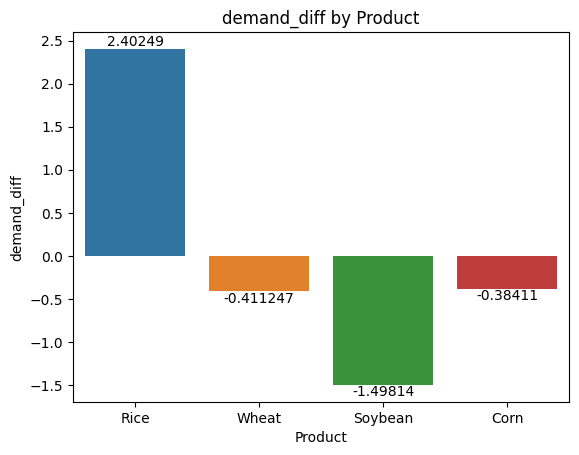

In [12]:
ax = sns.barplot(market_df,y = 'demand_diff', x='Product', hue = 'Product', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"demand_diff by Product")
plt.show()

In [33]:
demand_diff_ANOVA = f_oneway(market_rice_df['demand_diff'], market_wheat_df['demand_diff'], market_soybean_df['demand_diff'], market_corn_df['demand_diff'])

In [34]:
demand_diff_ANOVA.pvalue

0.12768263969640967

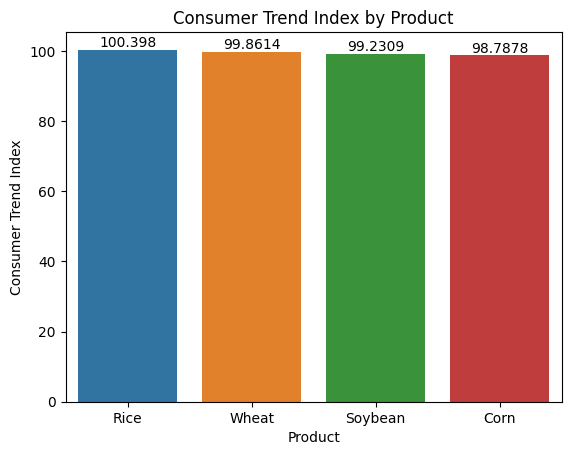

In [13]:
ax = sns.barplot(market_df,y = 'Consumer_Trend_Index', x='Product', hue = 'Product', errorbar=None)
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Consumer Trend Index by Product")
plt.ylabel("Consumer Trend Index")
plt.show()

In [14]:
pd.DataFrame(market_df.groupby('Product')['Seasonal_Factor'].value_counts())

count
Product Seasonal_Factor       
Corn    Medium             846
        Low                832
        High               772
Rice    Medium             873
        Low                854
        High               834
Soybean High               877
        Low                822
        Medium             815
Wheat   Medium             830
        High               829
        Low                816

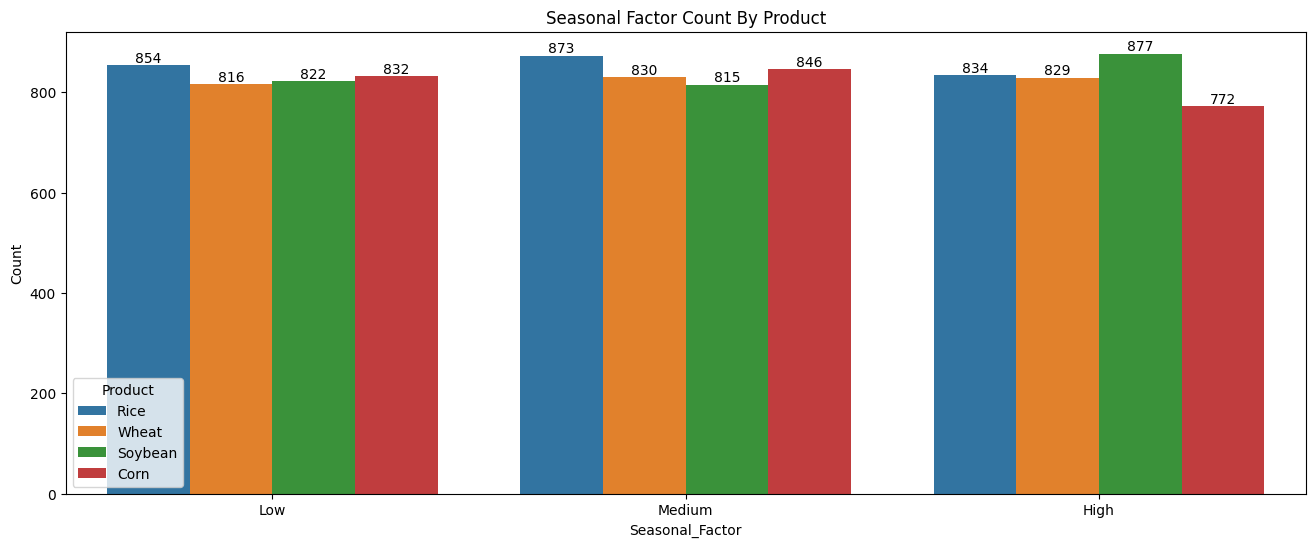

In [27]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(market_df,x = 'Seasonal_Factor', hue='Product', order=['Low', 'Medium', 'High'])
for i in ax.containers:
    ax.bar_label(i,)
plt.title(F"Seasonal Factor Count By Product")
plt.ylabel("Count")
plt.show()

In [ ]:
for mcd,crop in zip(market_crop_dfs,crop_names):
    print(F"Crop {crop}")
    print(mcd['Seasonal_Factor'].value_counts()[['High','Medium','Low']])
    print("\n")

Calculate resource efficiency metrics (yield per kg of fertilizer/pesticide)

Identify strategies that maintain profitability under challenging environmental conditions

Context of South Africa

Examine correlation between sustainability scores and profitability indicators
Identify practices that achieve both high sustainability and high profitability

Perform clustering analysis to identify farm groups with similar characteristics